<a href="https://colab.research.google.com/github/Dell-Marco/MVP_S3/blob/main/MVP3_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

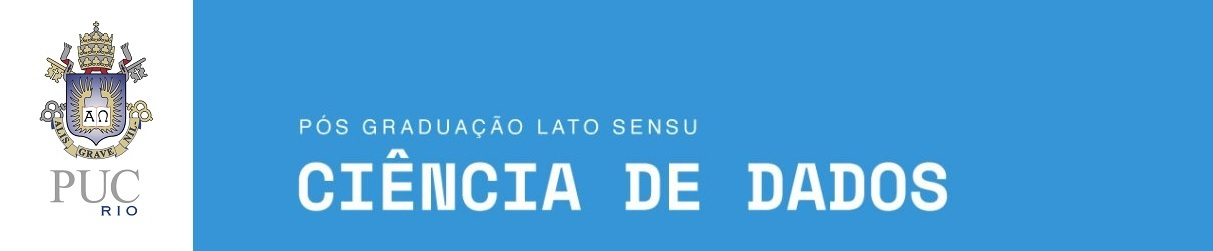

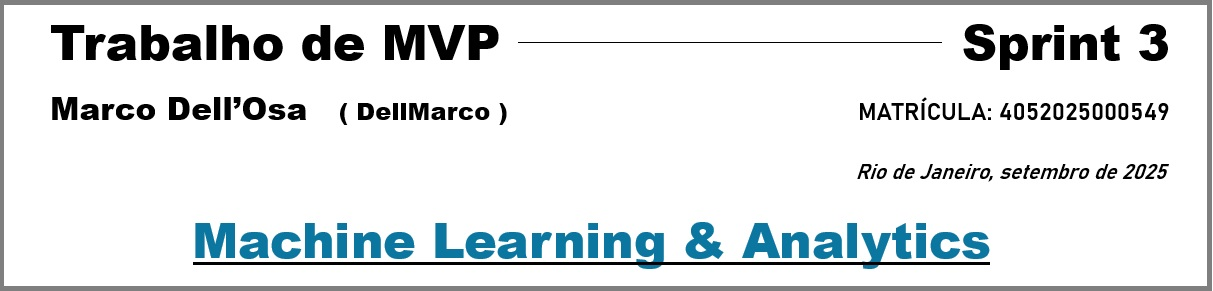

# Introdução
O propósito deste trabalho de MVP (Minimum Viable Product) é desenvolver uma solução para atender alguma necessidade, tomando decisões ou fazendo predições usando *Machine Learning*, ou seja, sem que seja feito algum programa específico para tal.

Para isto podemos escolher uma base de dados de algum tema para ser estudado de nosso interesse, desde que essa base de dados não tenha sido já usada no curso.
Podem ser usados repositórios como: Kaggle, UCI, Google Dataset ou Hugging Face, mas também pode ser usado um dataset específico de alguma empresa que reflita um problema real dela.

O problema de *Machine Learning* pode ser supervisionado ou não, e também pode ser do tipo: classificação, regressão, clusterização ou previsão de séries temporais (forecasting). Para a solução podemos usar modelos clássicos de *Machine Learning* e/ou *Deep Learning*, treinados do zero ou via fine-tuning de modelos pré-treinados.

# Objetivo 🎯
O objetivo é entender e descrever o problema proposto e apresentar uma solução para ele. Para isto deverá ser produzido um notebook no Google Colab do tipo 'relatório', descrevendo textualmente o contexto do problema e as operações com os dados. Para a programação deverá ser utilizada a linguagem Python com as bibliotecas apropriadas para abordar o problema proposto. Deverão ser seguidas as boas práticas de codificação vistas no curso.


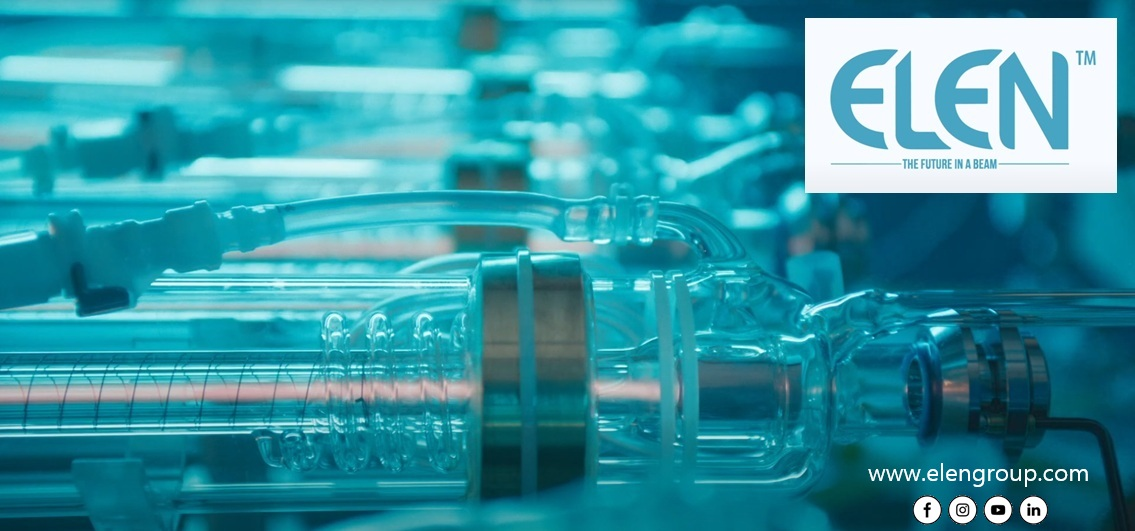

Este grande grupo italiano, além de ter fabricação própria de muitos tipos de lasers e potências, fabrica também as máquinas industriais para corte de metais, gravação em superfícies de todos os tipos, soldagem, máquinas para aplicações médicas, estética e também para restruturação de obras de arte.
Aqui abaixo tem uma pequena amostra de algumas aplicações.


---


Esta foto abaixo mostra uma máquina a laser para aplicações estéticas. As máquinas para aplicações médicas são muito parecidas e são por exemplo para dermatologia, oftalmologia, ginecologia, cirurgias, odontologia, etc...



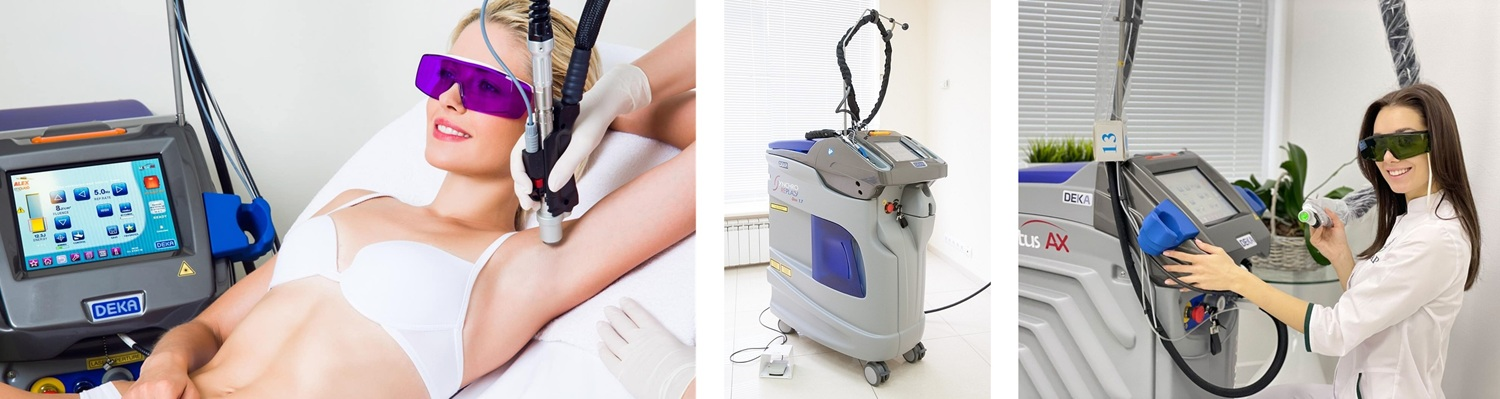



---


Nesta outra foto tem um dos tantos modelos de máquinas para corte a laser de chapas metálicas. Na direita mostra um bico de corte cortando peças desenhadas no CAD em uma chapa de aço, com muita precisão e facilidade.

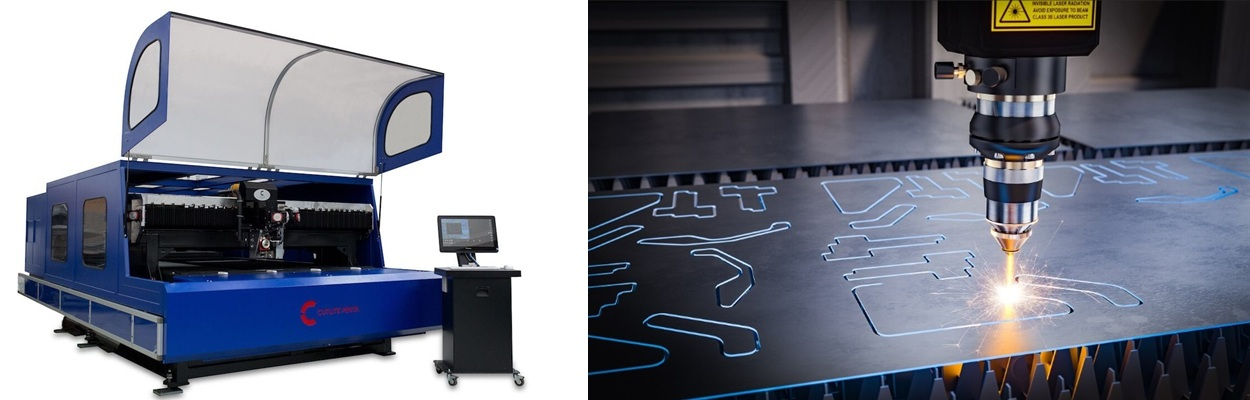



---


Nesta outra foto abaixo vemos que os lasers feitos pela ElEn são usados também
para restauração de antigas obras de artes recobertas por resíduos, acumulados ao longo de centenas ou até milhares de anos. É praticamente impossível limpar as obras manualmente sem danifica-las, o laser consegue fazer a limpeza graças ao pequeno comprimento de onda do laser que atinge apenas os resíduos evaporando-os. A Europa tem um campo muito vasto para esta aplicação.

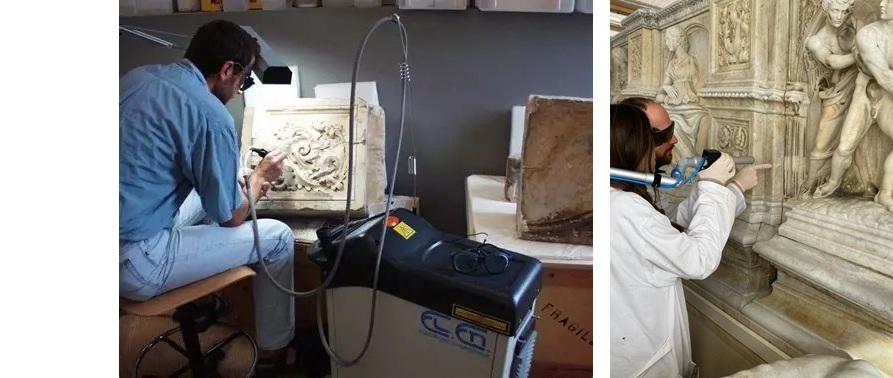

###Regras e restrições  👮‍♀️👨‍⚖️👮‍♂️

O trabalho deverá ser apresentado em um notebook desenvolvido no Google Colab. Seguindo as boas práticas de codificação, deverá ser usada a linguagem Python com as bibliotecas apropriadas para abordar o problema, descrevendo e comentando textualmente nas células do próprio notebook o contexto do problema e as operações feitas com os dados.

Existe uma restrição sobre a escolha do dataset, ele não pode ter sido usado nas aulas do curso. Foram dados como sugestão os repositórios da UCI Machine Learning Repository, Kaggle, Google Dataset e Hugging Face, mas outros repositórios podem ser usados.

O dataset deverá ser carregado através de uma URL dentro do próprio notebook, de forma a permitir a execução direta do código sem necessidade de realizar qualquer tipo de configuração ou ajuste.

##Nota: A celula 27 é uma imagem com o resultado do treinamento do modelo de rede neural, MLPRegressor com ajuste de hyperparametros. Retirei da execução pois pode demorar até 10 minutos.

linha2.jpg

#Definição do Problema 📐📏

###Descrição do Problema 🤔❓
Neste MVP irei analisar a variação do valor das ações na bolsa de valores de uma multinacional italiana, de nome **El.En. Group**, especializada em soluções a laser para aplicações médicas, industriais e científicas, com presença global e pela qual trabalhei por diversos anos.

Neste caso trata-se de resolver um problema de Machine Learning **supervisionado** do **tipo regressão** onde neste caso é importante preservar a sequência de acontecimento dos dados.

###Sobre o dataset escolhido  🎲🎲
Para este problema usei o dataset do repositório do Yahoo Finance. O Yahoo Finance fornece dados sobre as ações de muitas empresas listadas em grandes bolsas como NYSE, NASDAQ, B3 entre outras, fornece cotações em tempo real, gráficos interativos, indicadores técnicos e várias outras informações.

Na bolsa de valores cada empresa é identificada com um código chamado **Ticker**. No caso do Grupo El.En. (Electronic Engineering) é **ELN.MI** (https://finance.yahoo.com/quote/ELN.MI/)

Existe uma library que faz a importação do dataset do repositório do Yahoo chamada **yfinance**, onde podemos escolher a data inicial e final do dataset.

Para este trabalho irei importar os dados desde que a empresa entrou na bolsa de valores, que foi cerca de 25 anos atrás contendo os valores diários das cotações do grupo El.En.

###O dataset e seus atributos 📈
O dataset tem os atributos listados abaixo e pode mostrar a variação diária do preço das açoes desde que a empresa entrou na bolsa de valores (11 de dezembro de 2000) até hoje. É possível escolher a data inicial e final.

Atributos:
*   ***date*** -> data
*   ***close*** -> preço da ação no fechamento do dia (USD)
*   ***high*** -> preço máximo da ação do dia (USD)
*   ***low*** -> preço mínimo da ação do dia (USD)
*   ***open*** -> preço da ação na abertura do dia (USD)
*   ***volume*** -> volume negociado (USD)

linha2.jpg

#Preparação dos dados e pogramação

In [1]:
# @title 1. Importação das bibliotecas necessárias 📚

import pandas as pd                                        # Lib para ler e escrever arquivos CSV, filtrar, ordenar e transformar dados, bem como trabalhar com tabelas e dataframes
from sklearn.feature_selection import SelectKBest          # Para selecionar as melhores variáveis (features), melhora de desempenho em modelos de machine learning.
from sklearn.model_selection import GridSearchCV           # Busca por hiperparâmetros ideais, usa validação cruzada para encontrar o melhor modelo.
from sklearn.neural_network import MLPRegressor            # Modelo de rede neural artificial usado para regressão
from sklearn.preprocessing import MinMaxScaler             # Normaliza os dados, ajustando os valores geralmente entre 0 e 1
from sklearn import datasets, linear_model                 # Algoritmos de regressão e classificação linear, como regressão linear, logística e Ridge
from sklearn.metrics import mean_squared_error, r2_score   # Lib das métricas, para avaliar os modelos
import matplotlib.pyplot as plt                            # Lib para visualização de dados e criar gráficos
%matplotlib inline
import seaborn as sns                                      # Lib para visualização de dados e criar gráficos

import yfinance as yf                                      # Library que importa os dados diretamente do Yahoo Finance

import os, random, time, sys, math                         # Lib para interagir com o sistema operacional, manipular arquivos e diretórios, operações matematicas

pd.options.display.float_format = '{:.2f}'.format          # formata os valores da tabela com 2 casas decimais

import warnings                                            # Configuração para não exibir os avisos e warnings
warnings.filterwarnings("ignore")

print("Versão do Python: ", sys.version.split()[0])
print("Versão do Seaborn:", sns.__version__)

Versão do Python:  3.12.11
Versão do Seaborn: 0.13.2


In [2]:
# @title 2. Carga do dataset

Cotacoes = yf.Ticker("ELN.MI")      # Ticker é o identificador da empresa na bolsa de valores

#  Opções de períodos: 1d (dia), 5d, 1mo (mês), 3mo, 6mo, 1y (ano), 2y, 5y, 10y e ytd (todos os dados disponíveis).
df = Cotacoes.history(period="5y")  # Carregando dados dos últimos 5 anos

In [3]:
# @title 3. Analisando os dados - primeiras linhas do dataset
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-09-28 00:00:00+02:00,4.95,5.01,4.92,4.99,51932,0.00,0.00
2020-09-29 00:00:00+02:00,4.98,4.99,4.90,4.93,57232,0.00,0.00
2020-09-30 00:00:00+02:00,4.90,4.99,4.90,4.97,64644,0.00,0.00
2020-10-01 00:00:00+02:00,4.99,5.15,4.95,5.08,197304,0.00,0.00
2020-10-02 00:00:00+02:00,5.05,5.11,5.01,5.08,70184,0.00,0.00


A célula acima mostra as colunas: data (Date); valor na abertura (Open); valor maximo (High); valor mínimo (Low); valor no fechamento (Close); volume negociado (Volume); Dividends e Stock Splits. Estes dois últimos estão sempre zerados.

Nota-se também que a data está indexada. Para que o programa funcione é preciso desindexar a coluna da data e que seja do tipo DateTime. Farei em seguida.

In [4]:
# @title 4. Últimas linhas
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-09-22 00:00:00+02:00,11.61,11.61,11.36,11.45,72775,0.00,0.00
2025-09-23 00:00:00+02:00,11.20,11.69,11.20,11.43,112761,0.00,0.00
2025-09-24 00:00:00+02:00,11.29,11.39,11.11,11.17,114882,0.00,0.00
2025-09-25 00:00:00+02:00,11.10,11.10,10.90,10.93,76758,0.00,0.00
2025-09-26 00:00:00+02:00,10.92,11.04,10.85,10.91,56913,0.00,0.00


In [5]:
# @title 5.  Número de linhas e colunas
print('Linhas x Colunas')
df.shape

Linhas x Colunas


(1273, 7)

In [6]:
# @title 6. Dados estatísticos
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00,1273.00
mean,10.60,10.76,10.43,10.59,142769.72,0.00,0.00
std,2.36,2.39,2.32,2.35,164433.34,0.01,0.11
min,4.02,4.21,3.99,4.08,15202.00,0.00,0.00
25%,9.16,9.32,9.06,9.18,62012.00,0.00,0.00
50%,10.75,10.87,10.57,10.72,99096.00,0.00,0.00
75%,12.01,12.15,11.80,11.99,165806.00,0.00,0.00
max,16.56,16.83,16.30,16.56,2863888.00,0.22,4.00


A célula acima mostra que o desvio padrão (std) está um pouco alto, mais de 20% do valor mais alto, indica que é importante normalizar os dados, para trazer todos os dados numa mesma escala de modo que o modelo não dê mais ou menos importância a um certo atributo.

In [7]:
# @title 7. Ajustando o dataframe

# Desindexando a coluna Data
df.reset_index(inplace=True)
df.drop(df.tail(1).index,inplace=True)


# Eliminando colunas irrelevantes para esta análise. Estas duas colunas estão sempre zeradas
df.drop('Dividends', axis=1, inplace=True)
df.drop('Stock Splits', axis=1, inplace=True)


# Renomeando as colunas, para ficar mais claro
df.columns = ['Data','Abertura','Maximo','Minimo','Fechamento','Volume']


df.head()

,Data,Abertura,Maximo,Minimo,Fechamento,Volume
0,2020-09-28 00:00:00+02:00,4.95,5.01,4.92,4.99,51932
1,2020-09-29 00:00:00+02:00,4.98,4.99,4.90,4.93,57232
2,2020-09-30 00:00:00+02:00,4.90,4.99,4.90,4.97,64644
3,2020-10-01 00:00:00+02:00,4.99,5.15,4.95,5.08,197304
4,2020-10-02 00:00:00+02:00,5.05,5.11,5.01,5.08,70184


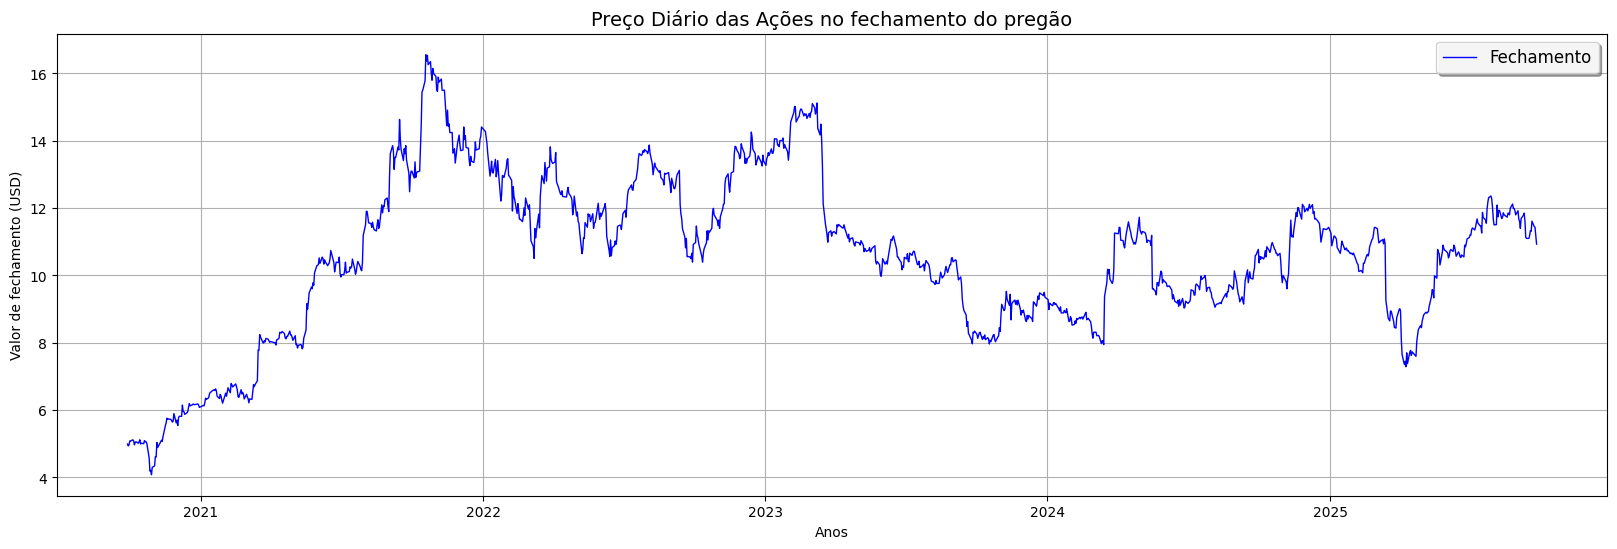

In [8]:
# @title 8. Visualizando os dados de Fechamento

plt.figure(figsize=(20, 6))  # largura = 20, altura = 6
plt.plot(df["Data"], df["Fechamento"], label='Fechamento', color='blue', linestyle='-', linewidth=1)
# plt.plot(df["Data"], df["Abertura"], label='abertura', color='grey', linestyle='-', linewidth=1)
plt.title("Preço Diário das Ações no fechamento do pregão", size = 14)
plt.xlabel('Anos')
plt.ylabel('Valor de fechamento (USD)')
plt.grid(True)
plt.legend(loc='upper right', fontsize='large', shadow=True, fancybox=True, framealpha=0.9)

plt.show()

In [9]:
# @title 9. Criação de outros campos
# Para dar ao modelo mais informações que possam melhorar as predições, é aconselhável criar mais campos.
# Mais pra frente utilizaremos kBest Features, que irá decidir quais atributos podem ser melhor aproveitados.

# Criação de coluna LAG1, que simplesmente desloca a coluna Fechamento de uma posição para frente. A ideia é
# fazer o modelo "pensar" que com os atributos do dia em análise o Fechamento é o do dia seguinte (do futuro).
# induzindo ele a fazer uma previsão baseada no dia seguinte.

df['Fech_LAG1'] = df['Fechamento'].shift(-1)
df.dropna(inplace=True)


# Criando novos campos de Média Movel com 5 Dias, 14 Dias e 21 Dias
df['mm5d']  = df['Fechamento'].rolling(5).mean()
df['mm14d'] = df['Fechamento'].rolling(14).mean()
df['mm21d'] = df['Fechamento'].rolling(21).mean()

In [10]:
# @title 10. Tipos de Dados

# Verificando o tipo dos dados: Data como datetime e o resto como float ou integer. 👍
df.dtypes

,0
Data,"datetime64[ns, Europe/Rome]"
Abertura,float64
Maximo,float64
Minimo,float64
Fechamento,float64
Volume,int64
Fech_LAG1,float64
mm5d,float64
mm14d,float64
mm21d,float64


In [11]:
# @title 11. Verificando valores nulos
# A criação destas novas variàveis, geram linhas com valores nulos tipo NaN, que devem ser eliminadas
# Verificando
df.isnull().sum()

,0
Data,0
Abertura,0
Maximo,0
Minimo,0
Fechamento,0
Volume,0
Fech_LAG1,0
mm5d,4
mm14d,13
mm21d,20


In [12]:
# @title 12. Eliminando os valores nulos
df.dropna(inplace=True)
df.isnull().sum()

,0
Data,0
Abertura,0
Maximo,0
Minimo,0
Fechamento,0
Volume,0
Fech_LAG1,0
mm5d,0
mm14d,0
mm21d,0


In [13]:
# @title 13. Visualizando o dataframe
df

,Data,Abertura,Maximo,Minimo,Fechamento,Volume,Fech_LAG1,mm5d,mm14d,mm21d
20,2020-10-26 00:00:00+01:00,4.90,4.96,4.57,4.58,432532,4.19,4.96,5.01,5.02
21,2020-10-27 00:00:00+01:00,4.58,4.58,4.17,4.19,735068,4.21,4.78,4.95,4.98
22,2020-10-28 00:00:00+01:00,4.11,4.21,3.99,4.21,483480,4.08,4.61,4.89,4.94
23,2020-10-29 00:00:00+01:00,4.21,4.21,4.04,4.08,140520,4.30,4.42,4.82,4.90
24,2020-10-30 00:00:00+01:00,4.02,4.35,3.99,4.30,350132,4.34,4.27,4.77,4.86
...,...,...,...,...,...,...,...,...,...,...
1266,2025-09-18 00:00:00+02:00,11.33,11.54,11.29,11.31,91279,11.61,11.20,11.48,11.63
1267,2025-09-19 00:00:00+02:00,11.38,11.78,11.28,11.61,218135,11.45,11.31,11.46,11.62
1268,2025-09-22 00:00:00+02:00,11.61,11.61,11.36,11.45,72775,11.43,11.38,11.44,11.60
1269,2025-09-23 00:00:00+02:00,11.20,11.69,11.20,11.43,112761,11.17,11.43,11.43,11.57


In [14]:
# @title 14. Verificando a quantidade de linhas e colunas
df.shape

(1251, 10)

In [15]:
# @title 15. Definindo a quantidade de linhas para Treino, Teste e Validação
qtd_linhas = len(df)
qtd_linhas_treino = qtd_linhas - 400  # Isto equivale a cerca de 30% do dataframe
qtd_linhas_teste = qtd_linhas - 20

qtd_linhas_validacao = qtd_linhas_treino - qtd_linhas_teste

info = (
    f"linhas treino = 0:{qtd_linhas_treino}"
    f" linhas teste = 0:{qtd_linhas_treino}:{qtd_linhas_teste}"
    f" linhas validacao = 0:{qtd_linhas_teste}:{qtd_linhas}"
)

info

'linhas treino = 0:851 linhas teste = 0:851:1231 linhas validacao = 0:1231:1251'

In [16]:
# @title 16. Reindexando o dataframe
# Com as operações anteriores a sequência do indice do dataframe ficou descontinuada. Com este comando corrigimos a sequência.
df = df.reset_index(drop=True)
df


,Data,Abertura,Maximo,Minimo,Fechamento,Volume,Fech_LAG1,mm5d,mm14d,mm21d
0,2020-10-26 00:00:00+01:00,4.90,4.96,4.57,4.58,432532,4.19,4.96,5.01,5.02
1,2020-10-27 00:00:00+01:00,4.58,4.58,4.17,4.19,735068,4.21,4.78,4.95,4.98
2,2020-10-28 00:00:00+01:00,4.11,4.21,3.99,4.21,483480,4.08,4.61,4.89,4.94
3,2020-10-29 00:00:00+01:00,4.21,4.21,4.04,4.08,140520,4.30,4.42,4.82,4.90
4,2020-10-30 00:00:00+01:00,4.02,4.35,3.99,4.30,350132,4.34,4.27,4.77,4.86
...,...,...,...,...,...,...,...,...,...,...
1246,2025-09-18 00:00:00+02:00,11.33,11.54,11.29,11.31,91279,11.61,11.20,11.48,11.63
1247,2025-09-19 00:00:00+02:00,11.38,11.78,11.28,11.61,218135,11.45,11.31,11.46,11.62
1248,2025-09-22 00:00:00+02:00,11.61,11.61,11.36,11.45,72775,11.43,11.38,11.44,11.60
1249,2025-09-23 00:00:00+02:00,11.20,11.69,11.20,11.43,112761,11.17,11.43,11.43,11.57


In [17]:
# @title 17. Eliminando variáveis
# Eliminando outras variáveis que não precisam estar no dataframe

#separando as features e labels
features = df.drop(['Data', 'Fechamento', 'Fech_LAG1'], axis=1)
labels = df['Fech_LAG1']

In [18]:
# @title 18. Aplicando KBest

# KBest irá decidir quais são as features mais relevantes para que se possam usar com os modelos.
# No passo anterior eliminei: Data, Fechamento, Fech_LAG1 e coloquei Fech_LAG1 como label.
features_list = ('Abertura', 'Maximo', 'Minimo', 'mm5d', 'mm14d', 'mm21d')

k_best_features = SelectKBest(k='all')
k_best_features.fit_transform(features, labels)
k_best_features_scores = k_best_features.scores_

# Convertendo para float e formatando com duas casas decimais
raw_pairs = zip(features_list[1:], [float(f"{score:.2f}") for score in k_best_features_scores])

ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))
k_best_features_final = dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()

print("\n** Melhores features **")
for feature, score in k_best_features_final.items():
    print(f"{feature}: {score:.2f}")



** Melhores features **
Minimo: 82.96
mm5d: 80.16
Maximo: 55.32
mm21d: 51.82
mm14d: 2.48


In [19]:
# @title 19. Separando as melhores features

# Irei manter apenas as features com valor acima de 50.0 para fazer as predições. As outras
# features irão prejudicar as predições do modelo.

# Criando um outro dataframe apenas com as features relevantes.
features = df.loc[:,['Maximo', 'Minimo', 'mm5d', 'mm21d']]
features.head()

,Maximo,Minimo,mm5d,mm21d
0,4.96,4.57,4.96,5.02
1,4.58,4.17,4.78,4.98
2,4.21,3.99,4.61,4.94
3,4.21,4.04,4.42,4.90
4,4.35,3.99,4.27,4.86


In [20]:
# @title 20. Normalizando os dados

# Normalizando os dados de entrada (features) para evitar que os valores fiquem desbalanceados.
# Isto irá colocar todas as features na mesma escala, entre 0 e 1
scaler = MinMaxScaler().fit(features)
features_scale = scaler.transform(features)

print('Features: ', features_scale.shape)
print(features_scale)

Features:  (1251, 4)
[[5.89727313e-02 4.72579351e-02 6.04516755e-02 2.16250430e-02]
 [2.90327336e-02 1.45123080e-02 4.56111398e-02 1.81909408e-02]
 [2.44011989e-08 3.72152410e-04 3.17098921e-02 1.51002494e-02]
 ...
 [5.86118173e-01 5.98898445e-01 5.86618546e-01 6.13842495e-01]
 [5.92457491e-01 5.85898375e-01 5.90720375e-01 6.10885986e-01]
 [5.68685086e-01 5.78585816e-01 5.88095207e-01 6.07372452e-01]]


In [21]:
# @title 21. Separação dos dados de treino, teste e validação
X_train = features_scale[:qtd_linhas_treino]
X_test = features_scale[qtd_linhas_treino:qtd_linhas_teste]

y_train = labels[:qtd_linhas_treino]
y_test = labels[qtd_linhas_treino:qtd_linhas_teste]

print( 'Linhas para treino:', len(X_train))
print( 'Linhas para teste: ',  len(X_test))

Linhas para treino: 851
Linhas para teste:  380


linha2.jpg

#Modelagem e treinamento

Em seguida irei avaliar o desempenho de cinco modelos que são específicos para problemas de regressão: Linear Regression, KNeighbors Regressor, Decision Tree Regressor, Support Vector Regression, MLPRegressor (rede neural) e MLPRegressor com ajuste de hiperparametros. Este último irei colocar apenas a imagem executado, pois demora por volta de 10 minutos para executar.

As métricas que irei usar para avaliar os modelos são a de erro quadrático médio
(MSE), erro absoluto médio (MAE) e o Coeficiente de Determinação (R2). No caso de MSE e MAE, quanto menor melhor e no caso de R2 quanto mais próximo de 1 melhor.

In [22]:
# @title 22. Regressão Linear
#treinamento usando Regressão Linear
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
pred_lr= lr.predict(X_test)

mse = mean_squared_error(y_test, pred_lr)
mae = mean_absolute_error(y_test, pred_lr)
cd =r2_score(y_test, pred_lr)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 : {cd * 100:.2f}')

MSE: 0.09
MAE: 0.19
R2 : 93.48


In [23]:
# @title 23. KNeighbors Regressor
#treinamento usando KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn= knn.predict(X_test)

mse = mean_squared_error(y_test, pred_knn)
mae = mean_absolute_error(y_test, pred_knn)
cd =r2_score(y_test, pred_knn)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 : {cd * 100:.2f}')

MSE: 0.13
MAE: 0.26
R2 : 90.25


In [24]:
# @title 24. Decision Tree Regressor
#treinamento usando DecisionTreeRegressor (Arvore de Decisão)
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42) #42 -> 85.42
dt.fit(X_train, y_train)
pred_dt= dt.predict(X_test)

mse = mean_squared_error(y_test, pred_dt)
mae = mean_absolute_error(y_test, pred_dt)
cd =r2_score(y_test, pred_dt)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 : {cd * 100:.2f}')

MSE: 0.21
MAE: 0.33
R2 : 84.15


In [25]:
# @title 25. Support Vector Regression
#treinamento usando SVR (Support Vector Regression)
from sklearn.svm import SVR

svr = SVR(kernel='rbf')  # rbf    -> 93.33  *
                         # linear -> 93.17
                         # poly   -> 76.31
svr.fit(X_train, y_train)

# Fazendo previsões
pred_svr = svr.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, pred_svr)
mae = mean_absolute_error(y_test, pred_svr)
cd = r2_score(y_test, pred_svr)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 : {cd * 100:.2f}')


MSE: 0.09
MAE: 0.19
R2 : 93.32


In [26]:
# @title 26. MLPRegressor (rede neural)
rn = MLPRegressor(max_iter=2000)

rn.fit(X_train, y_train)
pred_rn= rn.predict(X_test)

mse = mean_squared_error(y_test, pred_rn)
mae = mean_absolute_error(y_test, pred_rn)
cd = rn.score(X_test, y_test)
#cd = rn.score(y_test, pred_rn)

print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 : {cd * 100:.2f}')

MSE: 0.14
MAE: 0.26
R2 : 89.34


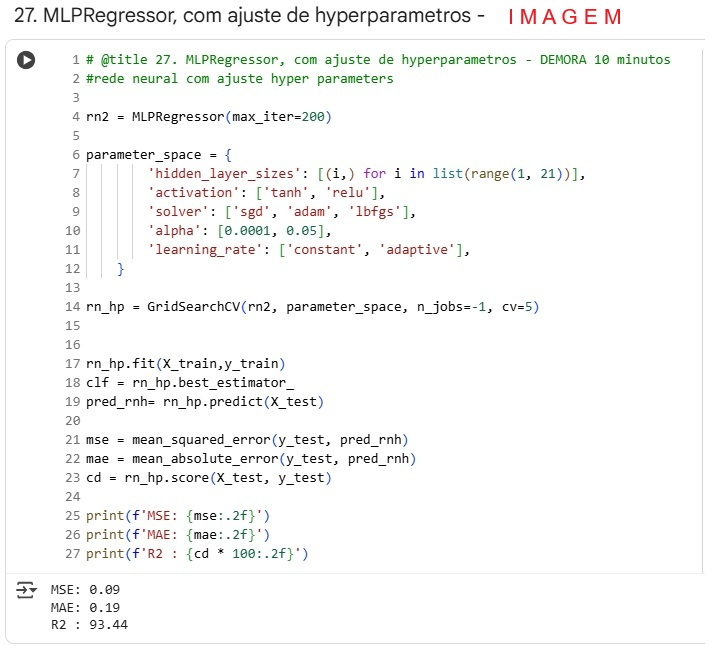

linha2.jpg

#Avaliação de Resultados 📐📏

In [27]:
# @title 28. Comparação da performance do modelo (LR) entre os dados de treino e os dados de teste
# para análise de overfitting


# Avaliação no treino
y_train_pred = lr.predict(X_train)
print("Treino MSE:", mean_squared_error(y_train, y_train_pred))
print("Treino R²:", r2_score(y_train, y_train_pred))

# Avaliação no teste
y_test_pred = lr.predict(X_test)
print("Teste MSE:", mean_squared_error(y_test, pred_lr))
print("Teste R²:", r2_score(y_test, pred_lr))


Treino MSE: 0.07872635135695218
Treino R²: 0.9884129195654447
Teste MSE: 0.08518822813240676
Teste R²: 0.9348270787498227


In [28]:
# @title 29. Resultados das previsões

# O modelo de Regressão Linear teve um melhor desempenho que os demais modelos, seguido de MLPRegressor com ajuste de hiperparametros.
# É intressante que no caso de MLPRegressor teve uma boa diferença entre ajustar os hiperparametros ou não. No modelo de Regressão Linear
# não tem ajustes de parametros. Num estudo mais profundo poderia se tentar fazer o ajuste com os outros modelos também.

# Vou reunir num dataframe as previsões dos seis casos
previsao = features_scale[qtd_linhas_teste:qtd_linhas]

data_pregao_full=df['Data']
data_pregao = data_pregao_full[qtd_linhas_teste:qtd_linhas]

res_full = df['Fechamento']
res=res_full[qtd_linhas_teste:qtd_linhas]


pred_lr = lr.predict(previsao)
pred_knn = knn.predict(previsao)
pred_dt = dt.predict(previsao)
pred_svr = svr.predict(previsao)
pred_rn = rn.predict(previsao)
#pred_rnhp = rn_hp.predict(previsao)  ####RETIRAR

# Gerando um segundo dataframe
#df2=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'LR':pred_lr, 'KNN':pred_knn, 'DT':pred_dt, 'SVR':pred_svr, 'RN':pred_rn, 'RN-hp':pred_rnhp})  ####RETIRAR
df2=pd.DataFrame({'data_pregao':data_pregao, 'real':res, 'LR':pred_lr, 'KNN':pred_knn, 'DT':pred_dt, 'SVR':pred_svr, 'RN':pred_rn})
df2['real'] = df2['real'].shift(+1) # recoloco a coluna dos valores reais (fechamento) na posição original, deslocando ela de volta de uma posição.

df2.set_index('data_pregao', inplace=True)

print(' ')
print('Comparativo das previsões dos modelos')
#df2.reset_index(inplace=True)
df2.head(20)

 
Comparativo das previsões dos modelos


,real,LR,KNN,DT,SVR,RN
data_pregao,,,,,,
2025-08-28 00:00:00+02:00,NaN,11.99,12.16,12.93,12.04,11.98
2025-08-29 00:00:00+02:00,11.92,11.97,12.16,11.61,12.02,11.95
2025-09-01 00:00:00+02:00,11.80,11.83,11.87,11.61,11.89,11.89
2025-09-02 00:00:00+02:00,11.92,11.72,11.55,11.60,11.79,11.82
2025-09-03 00:00:00+02:00,11.67,11.76,11.56,11.56,11.80,11.81
2025-09-04 00:00:00+02:00,11.61,11.50,11.49,11.76,11.56,11.66
2025-09-05 00:00:00+02:00,11.40,11.54,11.63,11.76,11.59,11.67
2025-09-08 00:00:00+02:00,11.69,11.74,11.68,11.80,11.76,11.74
2025-09-09 00:00:00+02:00,11.79,11.71,11.68,11.83,11.74,11.74


Abaixo está o gráfico comparando o modelo com melhor desempenho (em vermelho)com o modelo de pior desempenho (em cinza).
Nota que estas previsões são feitas com os dados que foram separadas para fazer o teste, ou seja, a base de teste.
O traço vermelho é da Regressão Linear e notamos que as previsões tendem a acompanhar os dados reais.

Certamente poderia ter tido um resultado melhor se eu tivesse usado a técnica de validação cruzada para
séries temporais TimeSeriesSplit, que respeita a ordem cronológica dos dados ao dividir em conjuntos
de treino e teste. Depois de várias tentativas não consegui implementa-la a tempo pela minha falta de
experiência.

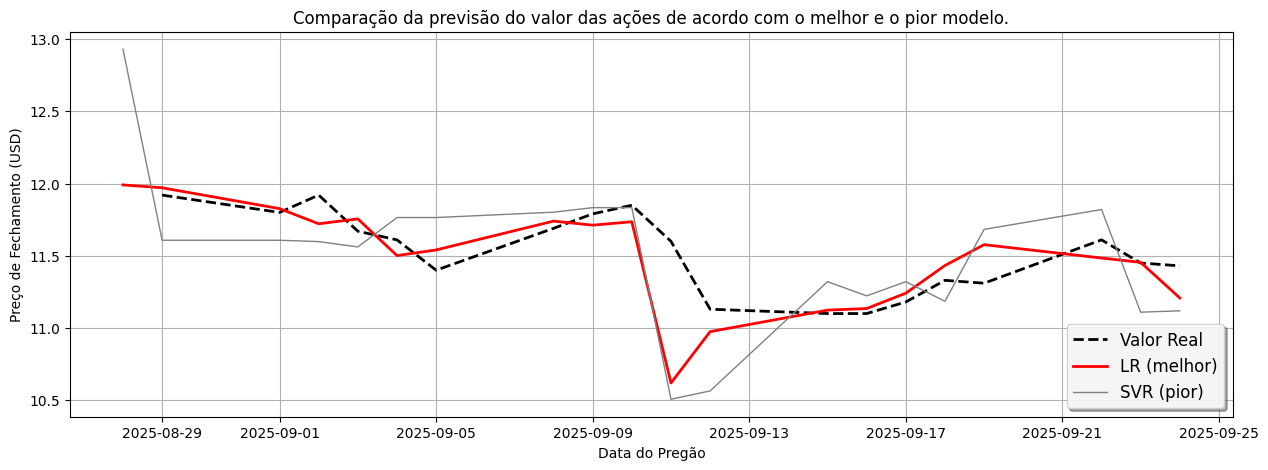

In [29]:
# @title 30. Gráficos comparativos

plt.figure(figsize=(15,5))

plt.title('Comparação da previsão do valor das ações de acordo com o melhor e o pior modelo.')
plt.plot(df2['real'], label='Valor Real', color='black', linestyle='--', linewidth=2)
plt.plot(df2['LR'], label='LR (melhor)', color='red', linestyle='-', linewidth=2)
plt.plot(df2['DT'], label='SVR (pior)', color='grey', linestyle='-', linewidth=1)


plt.xlabel('Data do Pregão')
plt.ylabel('Preço de Fechamento (USD)')

plt.grid(True)
plt.legend(loc='lower right', fontsize='large', shadow=True, fancybox=True, framealpha=0.9)

plt.show()

Coloco abaixo uma outra análise interessante que se pode fazer, usando uma função do Pandas (pct_change), que é calcular retorno diário de uma ação, ou seja, verificar a variação de quanto uma ação subiu ou desceu em relação ao dia anterior.


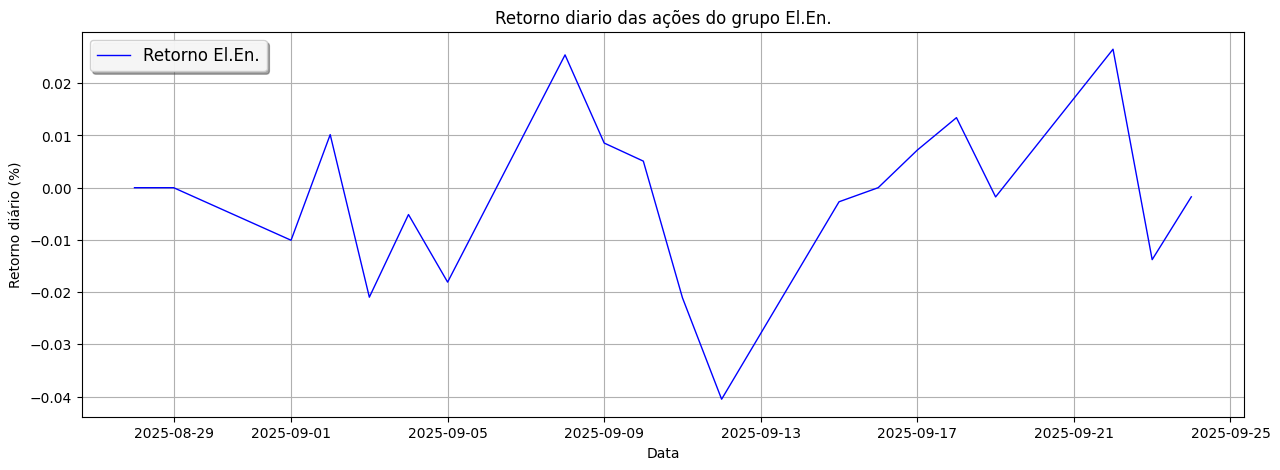

In [30]:
# @title 31. Análise do retorno

df2['retorno_diario'] = df2['real'].pct_change()
df2['retorno_diario'].fillna(0, inplace=True)

plt.figure(figsize=(15,5))
plt.title('Retorno diario das ações do grupo El.En.')
plt.plot(df2['retorno_diario'], label='Retorno El.En.', color='blue', linestyle='-', linewidth=1)
plt.xlabel('Data')
plt.ylabel('Retorno diário (%)')
plt.grid(True)
plt.legend(loc='upper left', fontsize='large', shadow=True, fancybox=True, framealpha=0.9)

plt.show()

Outra análise interessante, entre várias que podem ser feitas, é a densidade de probabilidade do retorno das ações. Veja gráfico abaixo.

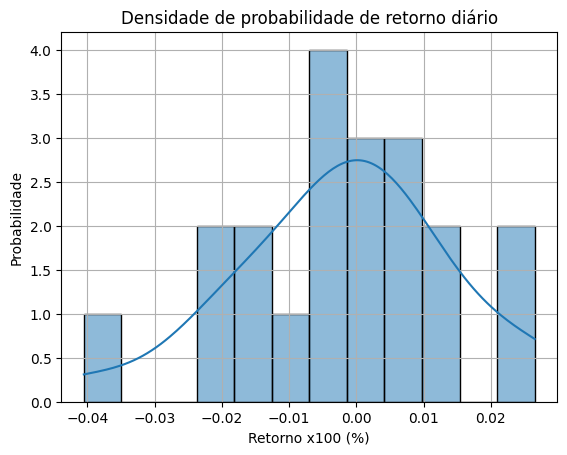

In [31]:
# @title 32. Densidade

sns.histplot(df2['retorno_diario'], bins=12, kde=True)

#plt.legend('DENS')

# Título e eixos
plt.title('Densidade de probabilidade de retorno diário')
plt.xlabel('Retorno x100 (%)')
plt.ylabel('Probabilidade')
plt.grid(True)
plt.show()


A maioria dos retornos acontecem entre -0.02 e 0.02 com pico máximo em 0.

Quais ações de empresas podemos ter na nossa carteira é fazendo uma analise de correlação entre ações de empresas,
O ideal é comprar ações que não tem correlação

linha2.jpg

#Conclusão 📐📏

 As métricas de avaliação de avaliação escolhidas: MSE, MAE e R2 condizem com o problema. Elas refletem bem a performance se se respeitar a ordem temporal na separação dos dados, e eu tive cuidado para respeitar isto até porque não usei validação cruzada.

 Treinei os cinco modelos com toda a base de treino e testei eles com a base de teste. Os cinco modelos tenderam a seguir os dados reais, alguns deles bem melhor do que outros, mas os resultados parecem fazer sentido.

 Não observei overfitting, pois na célula 28 podemos ver que o erro de treino e o erro de teste nos dois casos são baixos (MSE ou MAE) e R² é alto tanto no treino como no teste, que são bons resultados.

 O modelo que performou melhor (LR) teve R2=93.48 e parece muito bom, enquanto o que foi pior teve R2=84.67 (DTR), foi um bom resultado com a regressão linear. Com certeza poucos outliers e pouco ruído ajudaram bastante o modelo, mas sempre dá para melhorar ou testar alternativas.


---
